# 퍼셉트론

In [1]:
import numpy as np
X = np.array([[51, 15],[14,19],[0,4]])
X = X.flatten()
A = np.array([0, 2, 4])
print(A)
print(X[np.array([0, 2, 4])])
print(np.array([0, 2, 4]))
print(X[[0, 2, 4]])

[0 2 4]
[51 14  0]
[0 2 4]
[51 14  0]


##2.1 퍼셉트론이란?

퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.
<br/>입력은 없어도 출력은 1개 이상

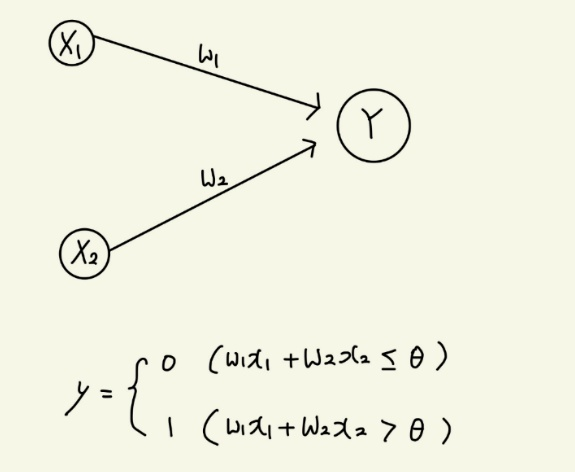

x1,x2 : 입력신호
<br/>y : 출력신호
<br/>w1,w2 : 가중치
<br/>theta : 임계값
<br/>각 원들은 뉴런/노드를 뜻한다.


입력신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.
<br/>뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다.


가중치가 클수록 해당 신호가 중요함을 뜻한다.

##2.2 & 2.3 단순한 논리 회로, 퍼셉트론 구현하기

* AND 게이트
<br/>- 입력이 둘이고 출력이 하나이다.
<br/>- x1,x2 모두가 1일 때만 가중 신호의 총합이 주어진 임계값을 웃돌게 된다. (AND : 둘 다 True일 때 True, 나머지는 False)
<br/>- AND 게이트를 구현하는 매개변수 조합은 무수히 많다. (ex) (w1, w2, theta) = (0.5, 0.5, 0.7), (1.0, 1.0, 1.0)

In [2]:
import numpy as np

In [3]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7    # 부호 바꾸기(tmp 계산용)
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


* NAND 게이트
<br/>- AND 게이트의 출력을 뒤집은 것과 같다. (NAND : 둘 다 True일 때 False, 나머지는 True)
<br/>- NAND 게이트를 구현하는 매개변수 조합은 AND 게이트를 구현하는 매개변수의 부호를 모두 반전시키면 된다.
<br/> (ex) (w1, w2, theta) = (-0.5, -0.5, -0.7), (-1.0, -1.0, -1.0)

In [5]:
def NAND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7     # b : 편향(bias)를 의미한다.
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


* OR 게이트
<br/>- AND 게이트와 비슷하지만 다르다. (OR : 둘 다 False일 때 False, 나머지는 True)
<br/>- OR 게이트를 구현하는 매개변수 조합도 무수히 많다. (ex) (0.5, 0,5, 0.2), (0.5, 0.5, 0.7)

In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다. 
<br/>매개변수(가중치와 임계값)만 바꿔주면 된다.

퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.


가중치 w1,w2는 각 입력신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수이고
<br/>편향은 뉴런이 얼마나 쉽게 활성화(결과가 1)되는지를 결정하는 매개변수이다.

##2.4 퍼셉트론의 한계

* XOR 게이트 (베타적 논리합)
<br/>- XOR : x1,x2 둘 중에 하나만 True일 때 True, 나머지는 False
<br/>- AND, NAND, OR 게이트와 다르게 단층 퍼셉트론으로 구현 불가능하다.

단층 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. 
<br/>즉, 단층 퍼셉트론은 선형 영역을 분리할 때만 사용 가능하다. (비선형 영역은 분리 불가)

##2.5 다층 퍼셉트론이 출동한다면

다층 퍼셉트론이란, 층이 여러 개인 퍼셉트론을 뜻한다.
<br/>다층 퍼셉트론은 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현 할 수 있게 해준다.

단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없지만 다층 퍼셉트론을 사용하면 구현 가능하다.
<br/>AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현할 수 있다.
<br/>XOR 게이트 : (NAND) AND (OR)

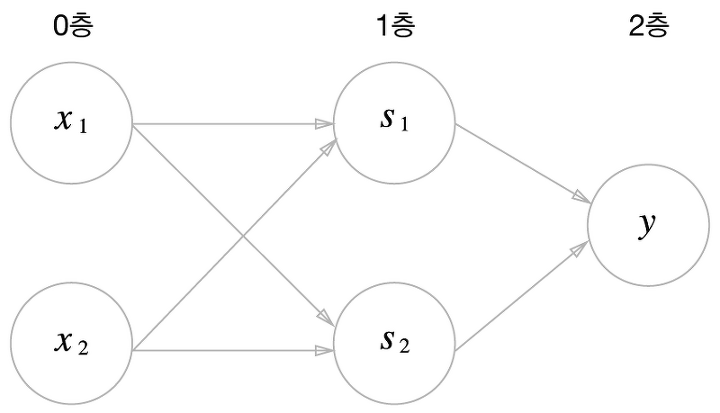

In [9]:
def XOR(x1, x2):
   s1 = NAND(x1, x2)
   s2 = OR(x1, x2)
   y = AND(s1, s2)
   return y

In [10]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0
